In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Step 2: Load Dataset
df = pd.read_excel("Session4-coredataset.xlsx")

In [14]:
# Step 3: Handle Missing Values
# Dropping rows with missing values (if any)
df = df.dropna()

In [29]:
# Step 4: Data Exploration
# Display basic information
print("Data Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe(include=np.number)) # Changed 'numerical' to np.number

Data Types:
Employee Name           object
Employee Number          int64
State                   object
Zip                      int64
DOB                     object
Age                      int64
Sex                     object
MaritalDesc             object
CitizenDesc             object
Hispanic/Latino         object
RaceDesc                object
Date of Hire            object
Date of Termination     object
Reason For Term         object
Employment Status       object
Department              object
Position                object
Pay Rate               float64
Manager Name            object
Employee Source         object
Performance Score       object
dtype: object

Summary Statistics:
       Employee Number           Zip         Age    Pay Rate
count     3.010000e+02    301.000000  301.000000  301.000000
mean      1.205421e+09   6705.196013   38.548173   30.715249
std       1.826616e+08  17167.527864    8.942884   15.216214
min       6.020003e+08   1013.000000   25.000000   14.0000

In [30]:
# Count the number of missing values in each column
missing_count = df.isnull().sum()
print(missing_count)

Employee Name            0
Employee Number          0
State                    0
Zip                      0
DOB                      0
Age                      0
Sex                      0
MaritalDesc              0
CitizenDesc              0
Hispanic/Latino          0
RaceDesc                 0
Date of Hire             0
Date of Termination    198
Reason For Term          0
Employment Status        0
Department               0
Position                 0
Pay Rate                 0
Manager Name             0
Employee Source          0
Performance Score        0
dtype: int64


<ipython-input-31-0a17dc92a371>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex', data=df, palette="pastel")  # Countplot with pastel colors


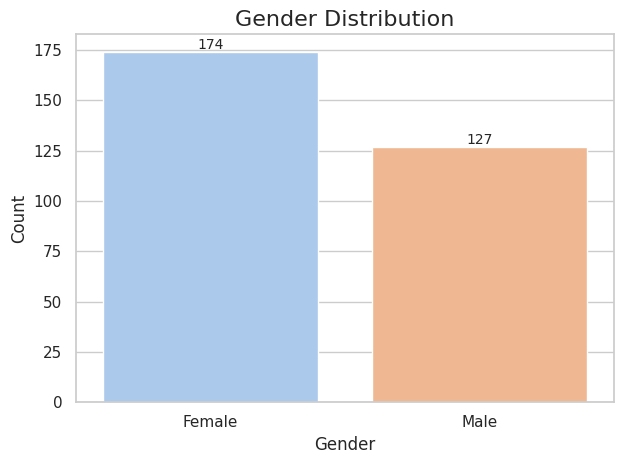

In [31]:
# Step 3.5: Standardize 'Sex' column
df['Sex'] = df['Sex'].str.title()  # Convert all entries to title case (e.g., "Male", "Female")

# Visualizing the data
sns.set(style="whitegrid")  # Optional: improve aesthetics
ax = sns.countplot(x='Sex', data=df, palette="pastel")  # Countplot with pastel colors
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()  # Adjust layout for clarity
plt.show()

<ipython-input-34-53eb1f0d7ffb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex', data=df, palette="bright")  # Countplot with bright colors


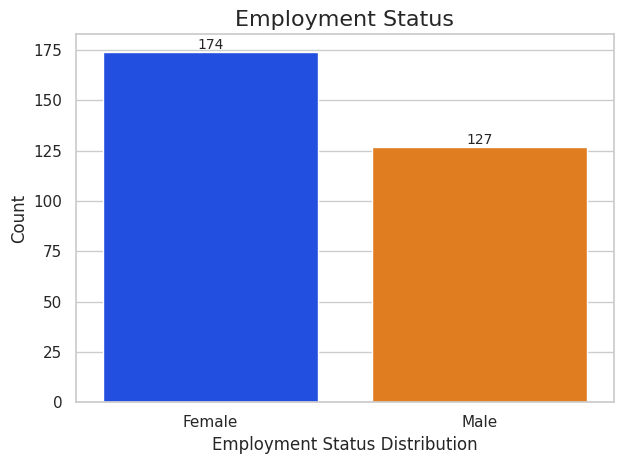

In [34]:
# Visualizing the data
sns.set(style="whitegrid")  # Optional: improve aesthetics
ax = sns.countplot(x='Sex', data=df, palette="bright")  # Countplot with bright colors
plt.title('Employment Status', fontsize=16)
plt.xlabel('Employment Status Distribution', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()  # Adjust layout for clarity
plt.show()

In [35]:

# Step 5: Generate Actionable Insights
# For demonstration purposes, analyzing only available columns
print("\nUnique values in 'Department':", df['Department'].unique())
print("\nPerformance Score distribution:")
print(df['Performance Score'].value_counts())


Unique values in 'Department': ['Admin Offices' 'Executive Office' 'IT/IS' 'Production       ' 'Sales'
 'Software Engineering' 'Software Engineering     ']

Performance Score distribution:
Performance Score
Fully Meets                 172
N/A- too early to review     37
90-day meets                 31
Exceeds                      28
Needs Improvement            15
Exceptional                   9
PIP                           9
Name: count, dtype: int64


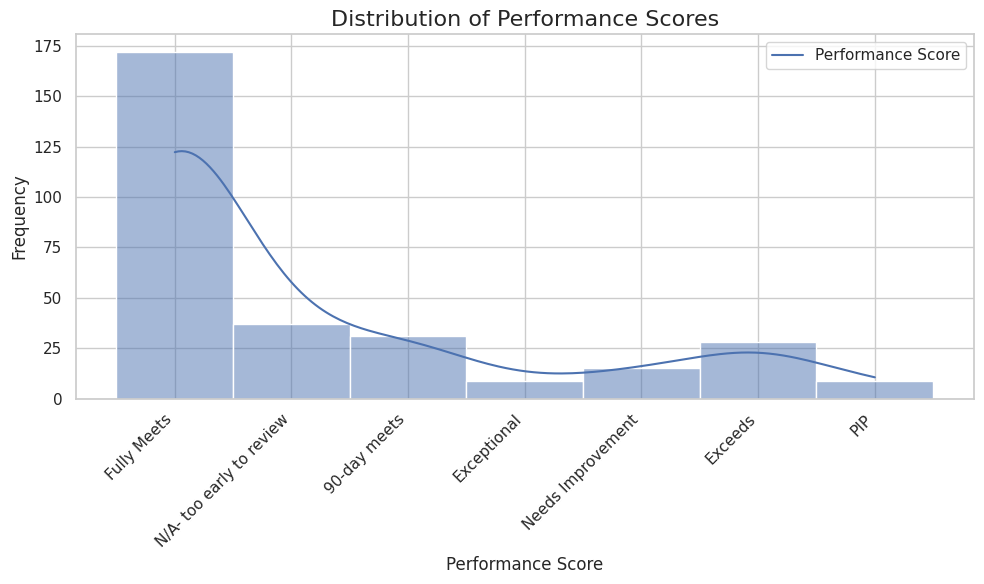

In [39]:
# Adding visualization for Performance Score distribution
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df['Performance Score'], bins=10, kde=True)  # Histogram with kernel density estimate
plt.title('Distribution of Performance Scores', fontsize=16)
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels to prevent overlap
plt.tight_layout()
plt.legend(['Performance Score'], loc='upper right')  # Keep labels in legend
plt.show()

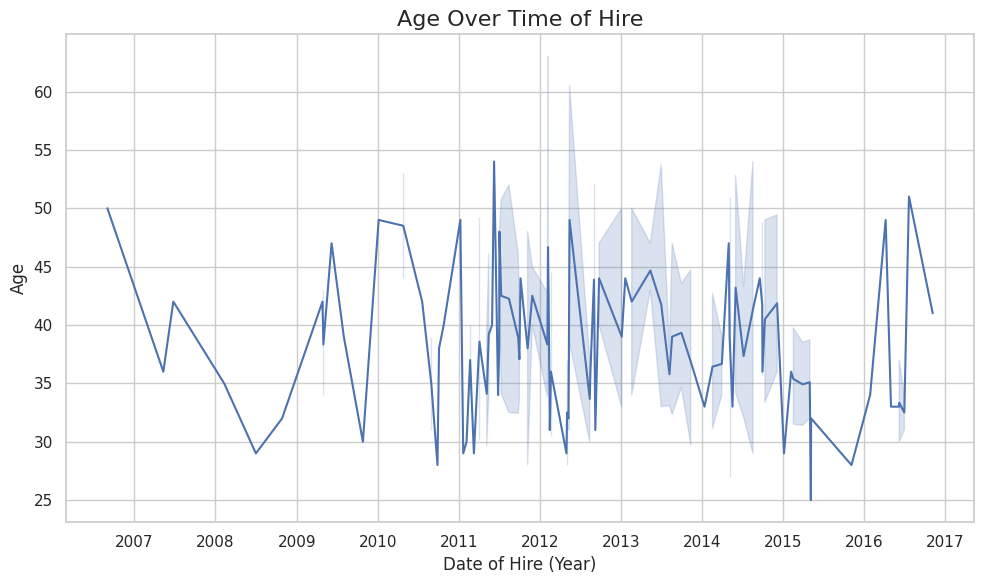

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # Import for date formatting

# ... (Your previous code) ...

# Time Series Analysis: Visualizing Date of Hire
plt.figure(figsize=(10, 6))

# Attempt to coerce dates to a standard format, handling errors
try:
    df['Date of Hire'] = pd.to_datetime(df['Date of Hire'], errors='coerce')
except Exception as e:
    print(f"Error during date coercion: {e}")

# Drop rows where date coercion failed (resulting in NaT values)
df = df.dropna(subset=['Date of Hire'])

# Convert valid 'Date of Hire' to strings for plotting
# df['Date of Hire'] = df['Date of Hire'].dt.strftime('%Y-%m-%d') # we won't do this now

sns.lineplot(x='Date of Hire', y='Age', data=df)
plt.title('Age Over Time of Hire', fontsize=16)
plt.xlabel('Date of Hire (Year)', fontsize=12)  # Updated x-axis label
plt.ylabel('Age', fontsize=12)

# Format x-axis to display only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display only years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set ticks at yearly intervals

plt.tight_layout()
plt.show()

<ipython-input-44-1277a9ae92a9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Hires', data=hires_by_year, palette="viridis")  # Use a color palette


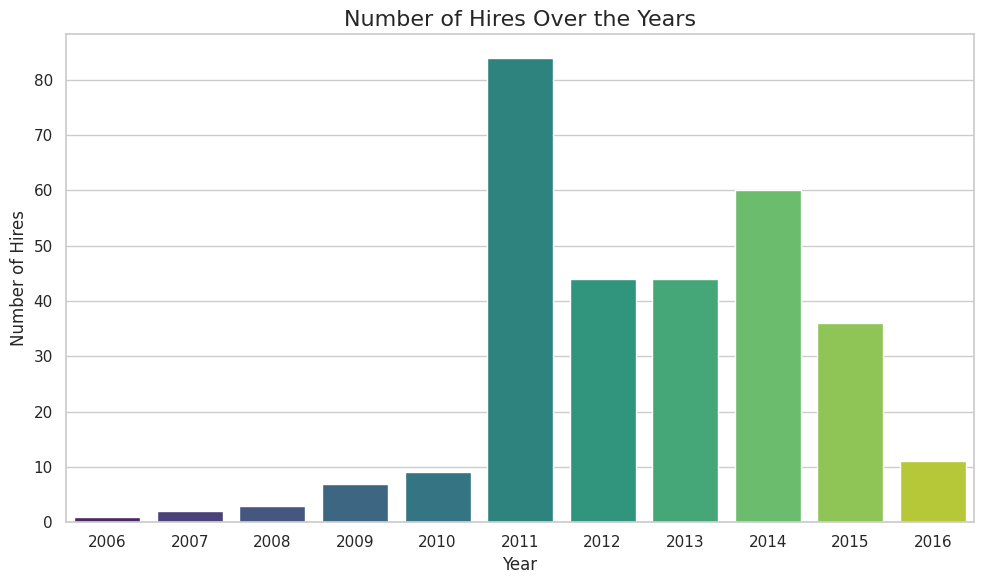

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# ... (Your previous code for loading and cleaning data) ...

# Group data by year and count hires
hires_by_year = df.groupby(df['Date of Hire'].dt.year)['Employee Number'].count().reset_index()
hires_by_year.columns = ['Year', 'Hires']  # Rename columns for clarity

# Plotting the number of hires over the years
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Hires', data=hires_by_year, palette="viridis")  # Use a color palette
plt.title('Number of Hires Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-48-c41fb71a4574>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Terminations', data=hires_by_year, palette="viridis")  # Use a color palette


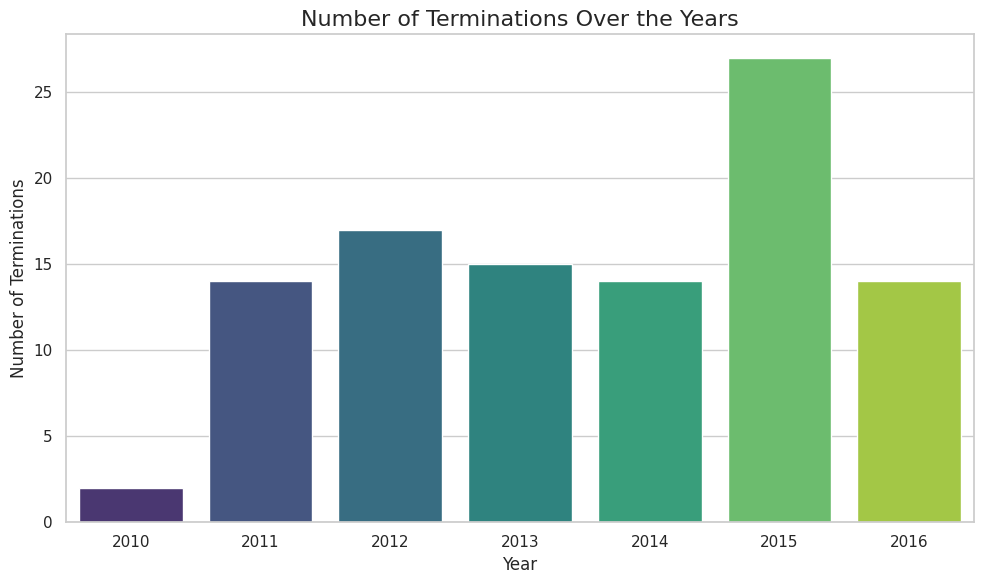

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# ... (Your previous code for loading and cleaning data) ...

# Convert 'Date of Termination' to datetime objects, handling errors
df['Date of Termination'] = pd.to_datetime(df['Date of Termination'], errors='coerce')

# Filter out rows with NaT (Not a Time) values in 'Date of Termination'
# before grouping to avoid errors
filtered_df = df.dropna(subset=['Date of Termination'])

# Group data by year and count terminations
hires_by_year = filtered_df.groupby(filtered_df['Date of Termination'].dt.year)['Employee Number'].count().reset_index()
hires_by_year.columns = ['Year', 'Terminations']  # Rename columns for clarity

# Plotting the number of terminations over the years
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Terminations', data=hires_by_year, palette="viridis")  # Use a color palette
plt.title('Number of Terminations Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Terminations', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-49-3c624503c286>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby('Age Group')['Employee Number'].count().reset_index()
<ipython-input-49-3c624503c286>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Employee Count', data=age_group_counts, palette="viridis")


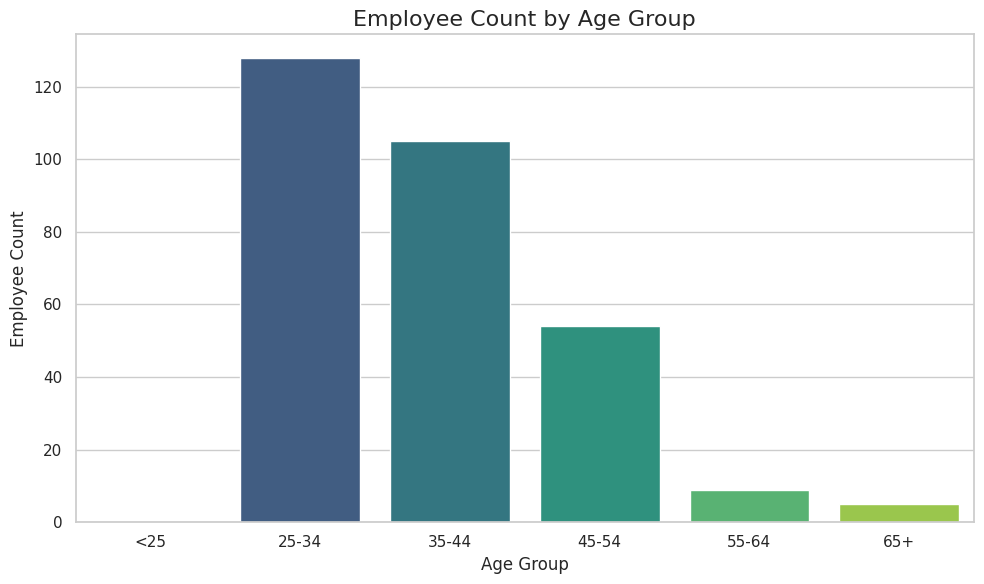

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing employee data with an 'Age' column

# Define age bands
age_bins = [0, 25, 35, 45, 55, 65, float('inf')]  # Customize as needed
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Group' based on age bands
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Age Group' and count employees in each band
age_group_counts = df.groupby('Age Group')['Employee Number'].count().reset_index()
age_group_counts.columns = ['Age Group', 'Employee Count']  # Rename for clarity

# Plotting the age group counts
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='Age Group', y='Employee Count', data=age_group_counts, palette="viridis")
plt.title('Employee Count by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-50-56c490e43fab>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MaritalDesc', y='Employee Count', data=marital_desc_counts, palette="viridis")


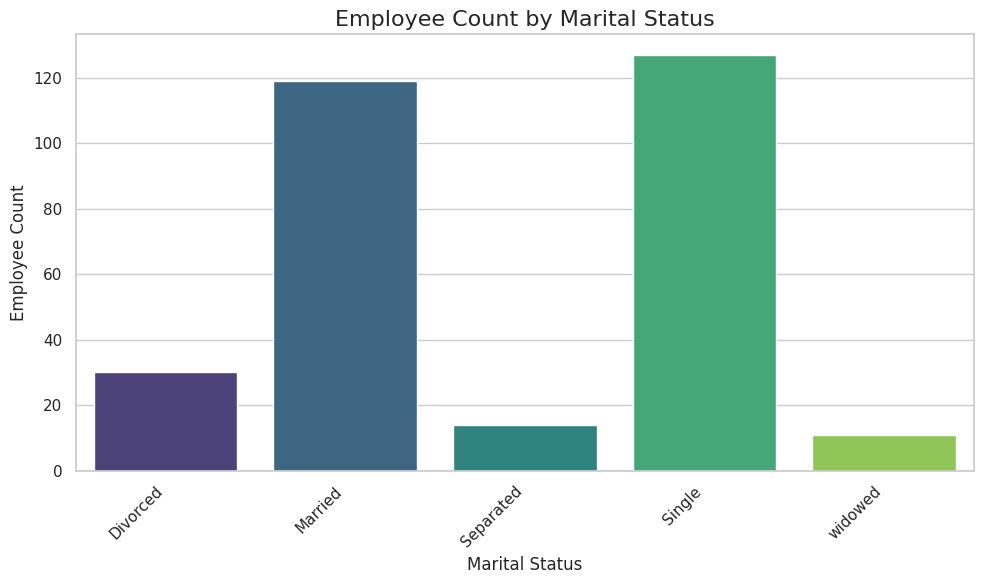

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'MaritalDesc' and 'Employee Number' columns

# Group by 'MaritalDesc' and count employees
marital_desc_counts = df.groupby('MaritalDesc')['Employee Number'].count().reset_index()
marital_desc_counts.columns = ['MaritalDesc', 'Employee Count']  # Rename for clarity

# Plotting the MaritalDesc counts
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='MaritalDesc', y='Employee Count', data=marital_desc_counts, palette="viridis")
plt.title('Employee Count by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability
plt.tight_layout()
plt.show()

<ipython-input-56-835b8ea60d5c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Employee Count', data=state_counts, palette="viridis")


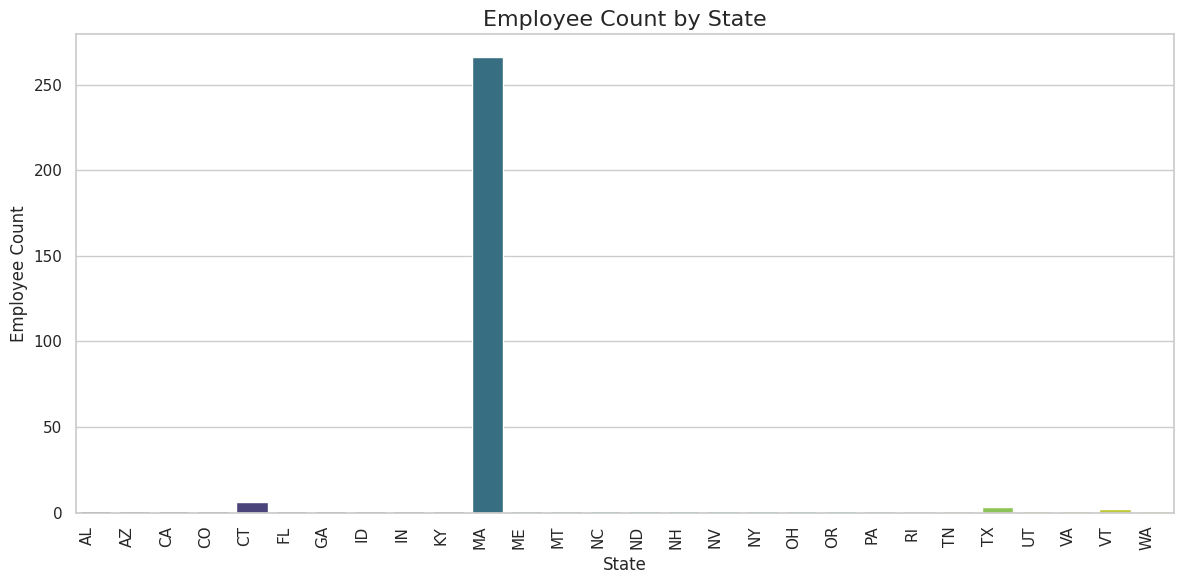

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'State' and 'Employee Number' columns

# Group by 'State' and count employees
state_counts = df.groupby('State')['Employee Number'].count().reset_index()
state_counts.columns = ['State', 'Employee Count']  # Rename for clarity
# Get the top 10 states with the most employees
top_10_states = state_counts.sort_values(by='Employee Count', ascending=False).head(10)

# Plotting the State counts
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='State', y='Employee Count', data=state_counts, palette="viridis")
plt.title('Employee Count by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-58-b9b2a7dd5c83>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='State', y='Employee Count', data=top_10_states, palette="viridis")


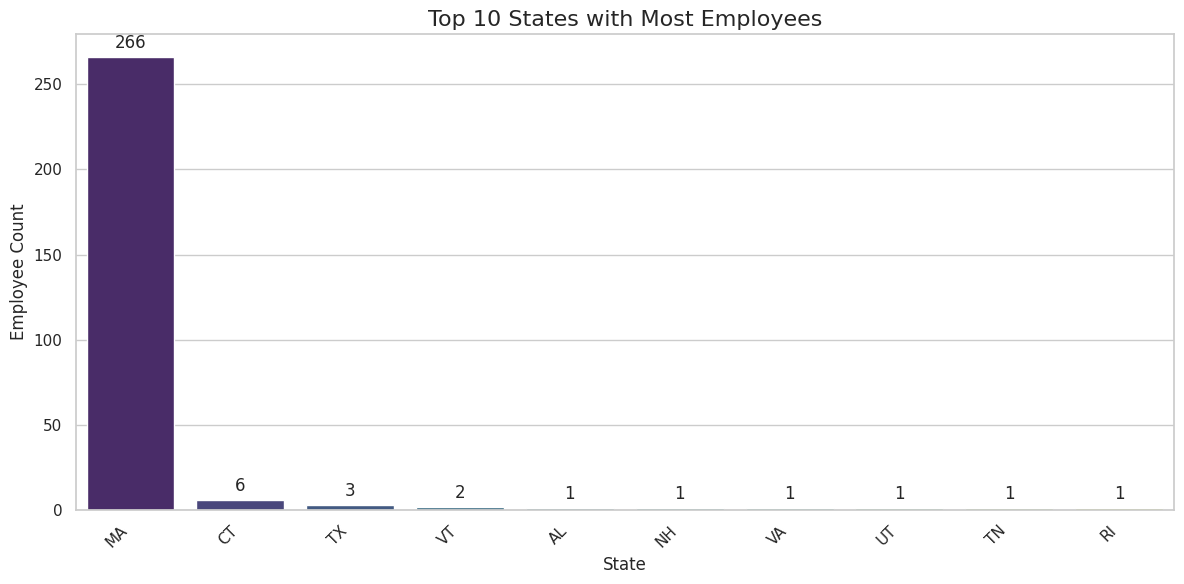

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code for grouping and getting top 10 states) ...

# Plotting the top 10 State counts with employee numbers on bars
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='State', y='Employee Count', data=top_10_states, palette="viridis")
plt.title('Top 10 States with Most Employees', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'State', 'Zip', and 'Employee Number' columns

# Group by 'State' and 'Zip' and count employees
state_zip_counts = df.groupby(['State', 'Zip'])['Employee Number'].count().reset_index()
state_zip_counts.columns = ['State', 'Zip', 'Employee Count']  # Rename for clarity

# Sort by 'Employee Count' in descending order and get the top 10
top_10_state_zips = state_zip_counts.sort_values(by='Employee Count', ascending=False).head(10)

# Display the top 10 state-zip combinations
print(top_10_state_zips)

    State   Zip  Employee Count
45     MA  1886              12
36     MA  1810               7
102    MA  2176               7
121    MA  2451               7
99     MA  2169               6
18     MA  1460               5
61     MA  2045               5
111    MA  2324               5
74     MA  2110               5
100    MA  2170               5


<ipython-input-62-b3df65195379>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CitizenDesc', y='Employee Count', data=citizen_counts, palette="viridis")  # Assign to ax


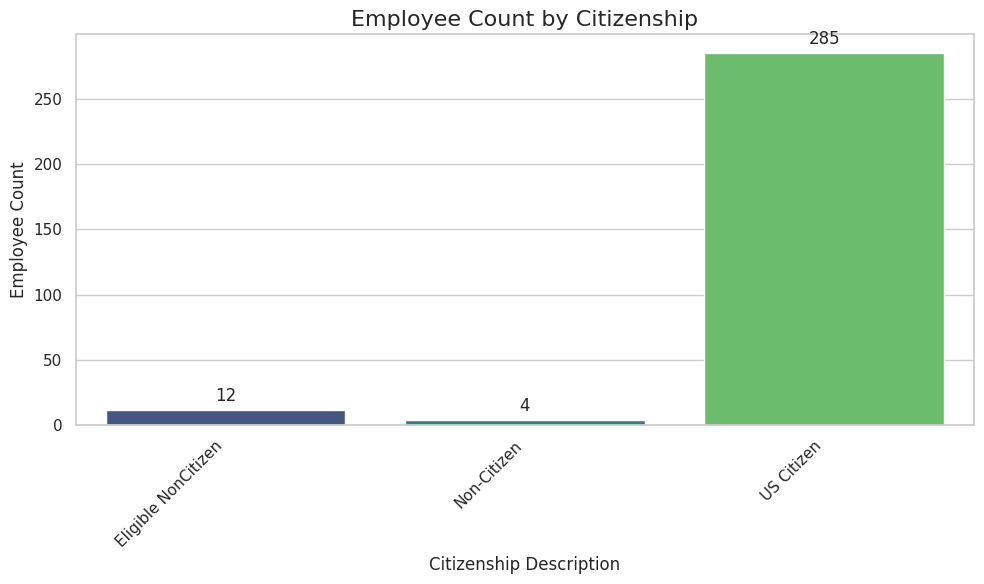

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'CitizenDesc' and 'Employee Number' columns

# Group by 'CitizenDesc' and count employees
citizen_counts = df.groupby('CitizenDesc')['Employee Number'].count().reset_index()
citizen_counts.columns = ['CitizenDesc', 'Employee Count']  # Rename for clarity

# Plotting the CitizenDesc counts
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.barplot(x='CitizenDesc', y='Employee Count', data=citizen_counts, palette="viridis")  # Assign to ax
plt.title('Employee Count by Citizenship', fontsize=16)
plt.xlabel('Citizenship Description', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

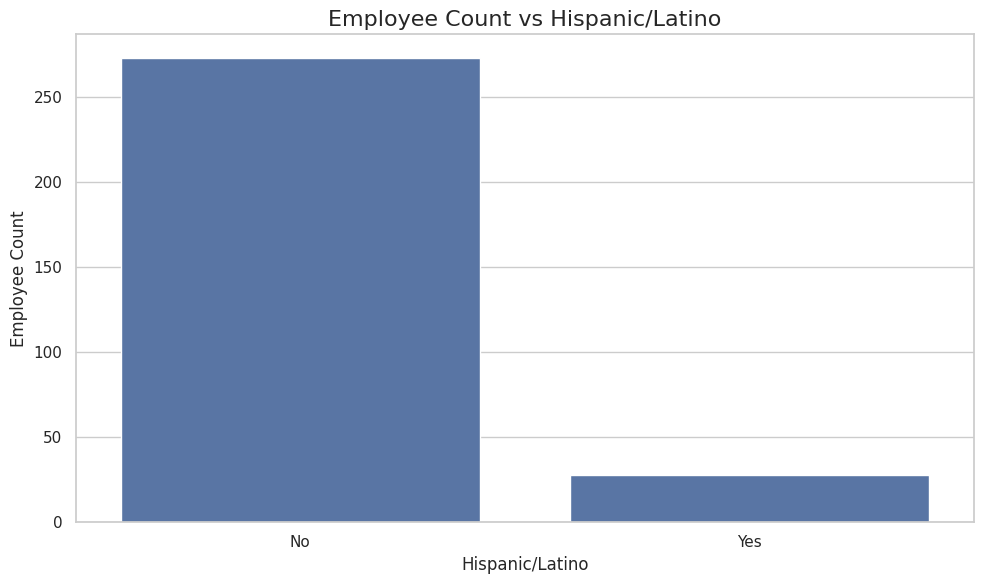

In [67]:
# Visualizing Employee Count vs Hispanic/Latino
df['Hispanic/Latino'] = df['Hispanic/Latino'].str.title()
plt.figure(figsize=(10, 6))
sns.countplot(x='Hispanic/Latino', data=df)
plt.title('Employee Count vs Hispanic/Latino', fontsize=16)
plt.xlabel('Hispanic/Latino', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-68-67124460b986>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Reason For Term', y='Employee Count', data=reason_for_term_counts, palette="viridis")


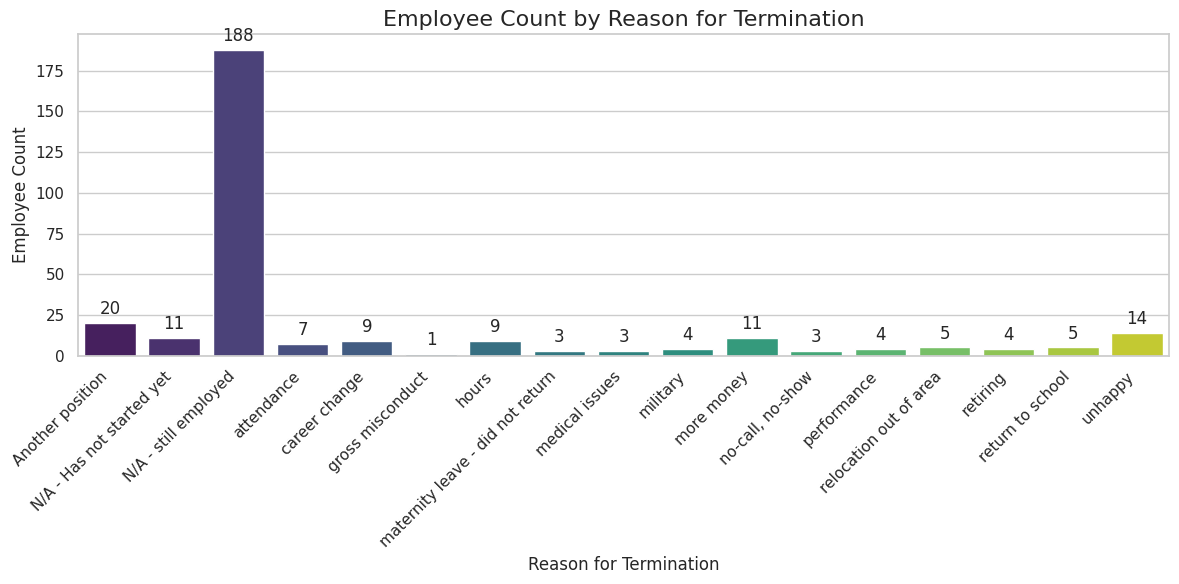

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Reason For Term' and 'Employee Number' columns

# Group by 'Reason For Term' and count employees
reason_for_term_counts = df.groupby('Reason For Term')['Employee Number'].count().reset_index()
reason_for_term_counts.columns = ['Reason For Term', 'Employee Count']  # Rename for clarity

# Plotting the Reason For Term counts
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Reason For Term', y='Employee Count', data=reason_for_term_counts, palette="viridis")
plt.title('Employee Count by Reason for Termination', fontsize=16)
plt.xlabel('Reason for Termination', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-69-ec0dacc4810d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Employment Status', y='Employee Count', data=emp_status_counts, palette="viridis")


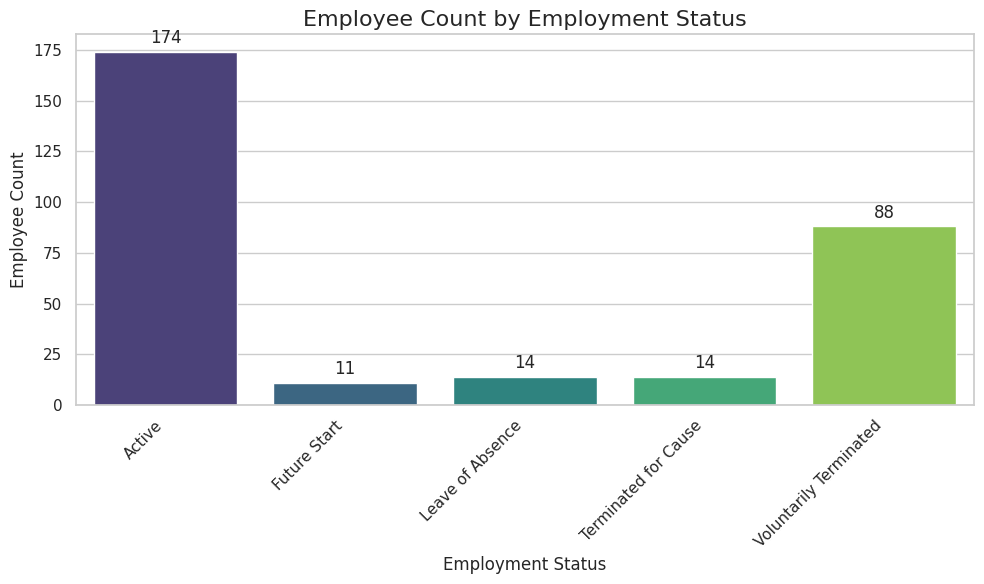

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Employment Status' and 'Employee Number' columns

# Group by 'Employment Status' and count employees
emp_status_counts = df.groupby('Employment Status')['Employee Number'].count().reset_index()
emp_status_counts.columns = ['Employment Status', 'Employee Count']  # Rename for clarity

# Plotting the Employment Status counts
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Employment Status', y='Employee Count', data=emp_status_counts, palette="viridis")
plt.title('Employee Count by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-70-cc08b7ee7201>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Department', y='Employee Count', data=department_counts, palette="viridis")


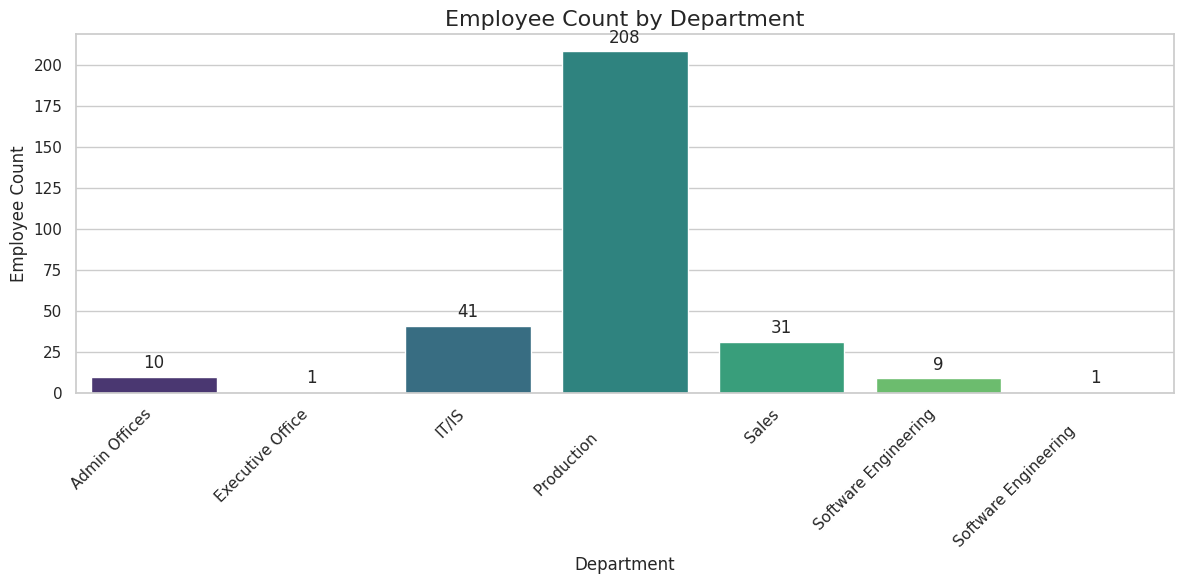

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Department' and 'Employee Number' columns

# Group by 'Department' and count employees
department_counts = df.groupby('Department')['Employee Number'].count().reset_index()
department_counts.columns = ['Department', 'Employee Count']  # Rename for clarity

# Plotting the Department counts
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Department', y='Employee Count', data=department_counts, palette="viridis")
plt.title('Employee Count by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-71-214c6c4c7c17>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Position', y='Employee Count', data=position_counts, palette="viridis")


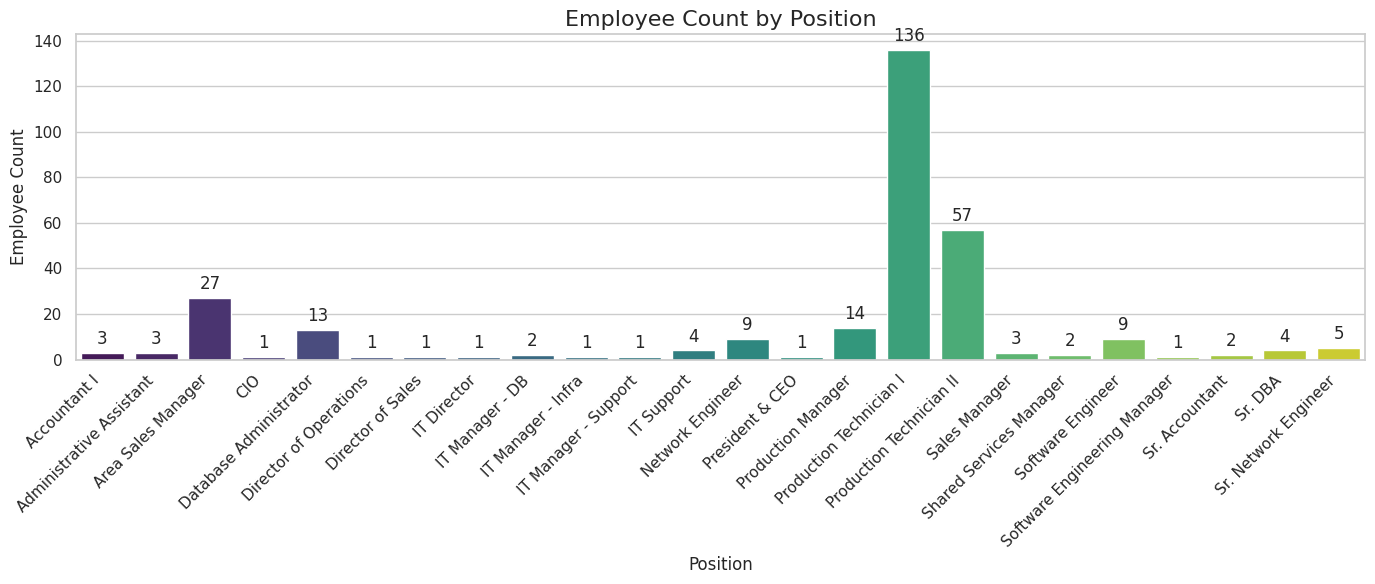

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Position' and 'Employee Number' columns

# Group by 'Position' and count employees
position_counts = df.groupby('Position')['Employee Number'].count().reset_index()
position_counts.columns = ['Position', 'Employee Count']  # Rename for clarity

# Plotting the Position counts
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Position', y='Employee Count', data=position_counts, palette="viridis")
plt.title('Employee Count by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-72-48a1f46618ad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Manager Name', y='Employee Count', data=manager_counts, palette="viridis")


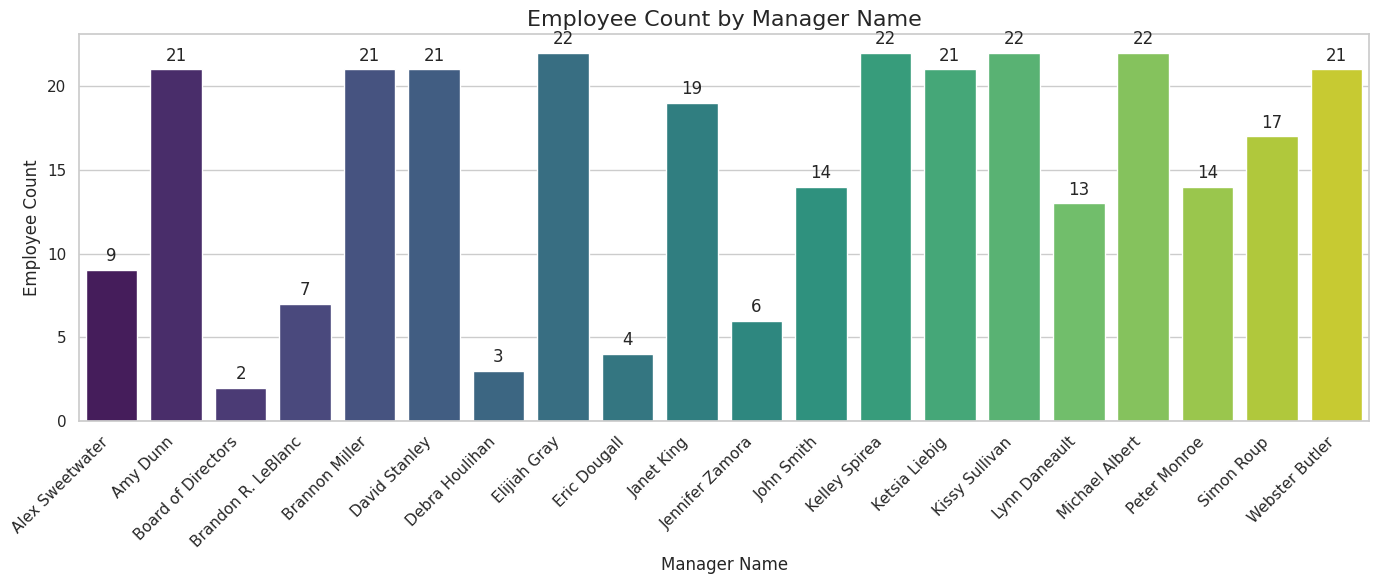

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Manager Name' and 'Employee Number' columns

# Group by 'Manager Name' and count employees
manager_counts = df.groupby('Manager Name')['Employee Number'].count().reset_index()
manager_counts.columns = ['Manager Name', 'Employee Count']  # Rename for clarity

# Plotting the Manager Name counts
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Manager Name', y='Employee Count', data=manager_counts, palette="viridis")
plt.title('Employee Count by Manager Name', fontsize=16)
plt.xlabel('Manager Name', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-73-8c61157c5317>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Employee Source', y='Employee Count', data=source_counts, palette="viridis")


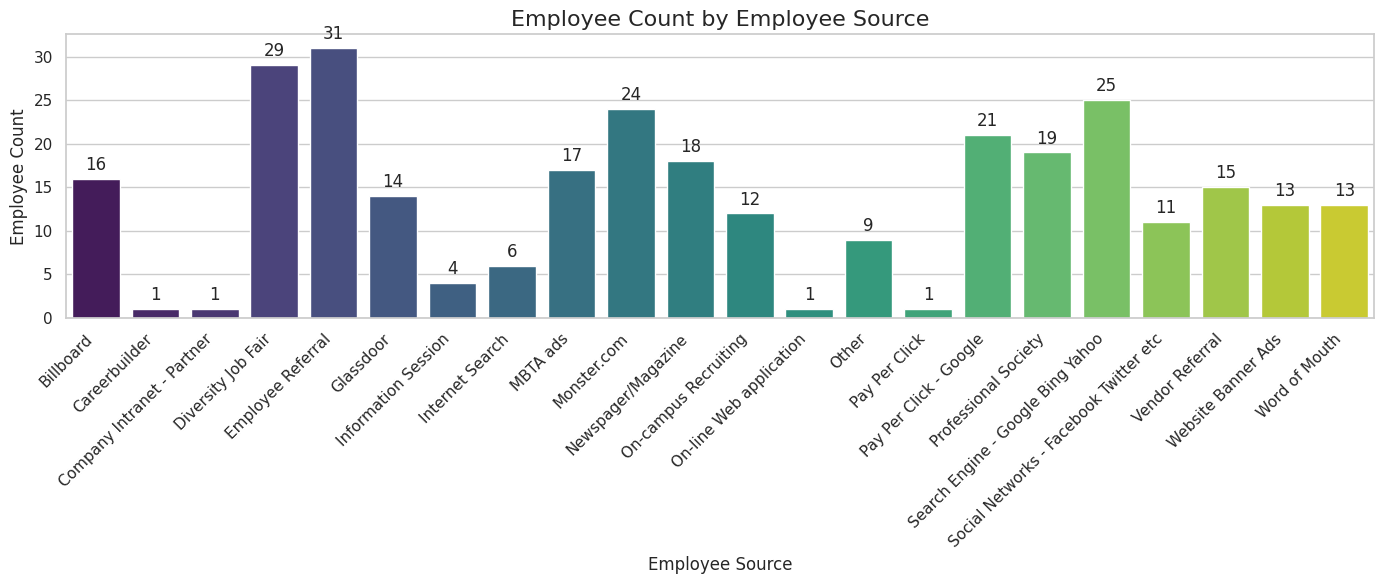

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Employee Source' and 'Employee Number' columns

# Group by 'Employee Source' and count employees
source_counts = df.groupby('Employee Source')['Employee Number'].count().reset_index()
source_counts.columns = ['Employee Source', 'Employee Count']  # Rename for clarity

# Plotting the Employee Source counts
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Employee Source', y='Employee Count', data=source_counts, palette="viridis")
plt.title('Employee Count by Employee Source', fontsize=16)
plt.xlabel('Employee Source', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

<ipython-input-74-cc7ca784545e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Performance Score', y='Employee Count', data=performance_counts, palette="viridis")


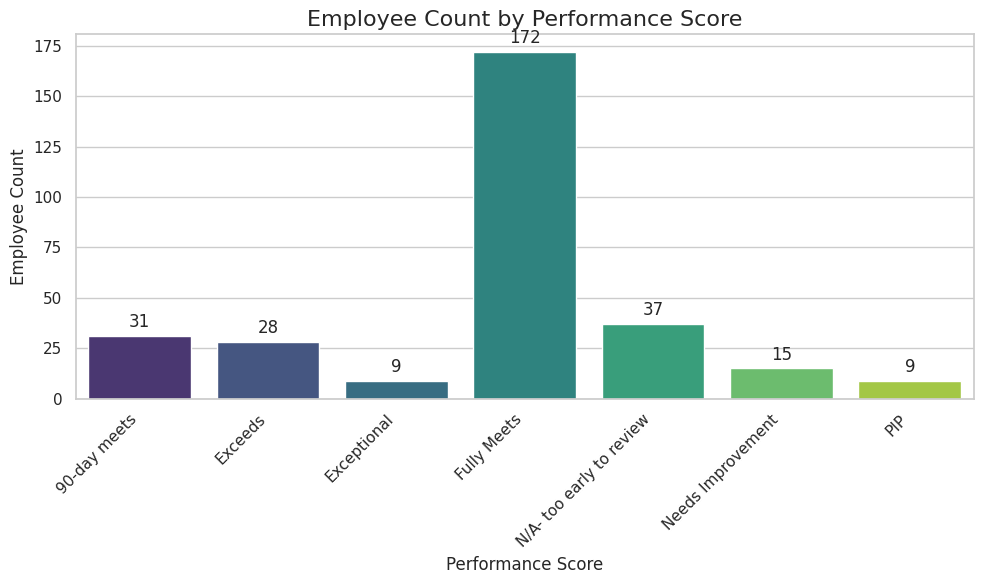

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Performance Score' and 'Employee Number' columns

# Group by 'Performance Score' and count employees
performance_counts = df.groupby('Performance Score')['Employee Number'].count().reset_index()
performance_counts.columns = ['Performance Score', 'Employee Count']  # Rename for clarity

# Plotting the Performance Score counts
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Performance Score', y='Employee Count', data=performance_counts, palette="viridis")
plt.title('Employee Count by Performance Score', fontsize=16)
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

Top 10 Pay Rates with Most Employees:
    Pay Rate  Employee Count
20      22.0              25
73      55.0              24
15      20.0              16
17      21.0              16
24      24.0              15
1       15.0              13
5       16.0              13
9       17.0              12
12      19.0              11
22      23.0              10


<ipython-input-76-9a0f5e4a1370>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pay Rate', y='Employee Count', data=pay_rate_counts, palette="viridis")


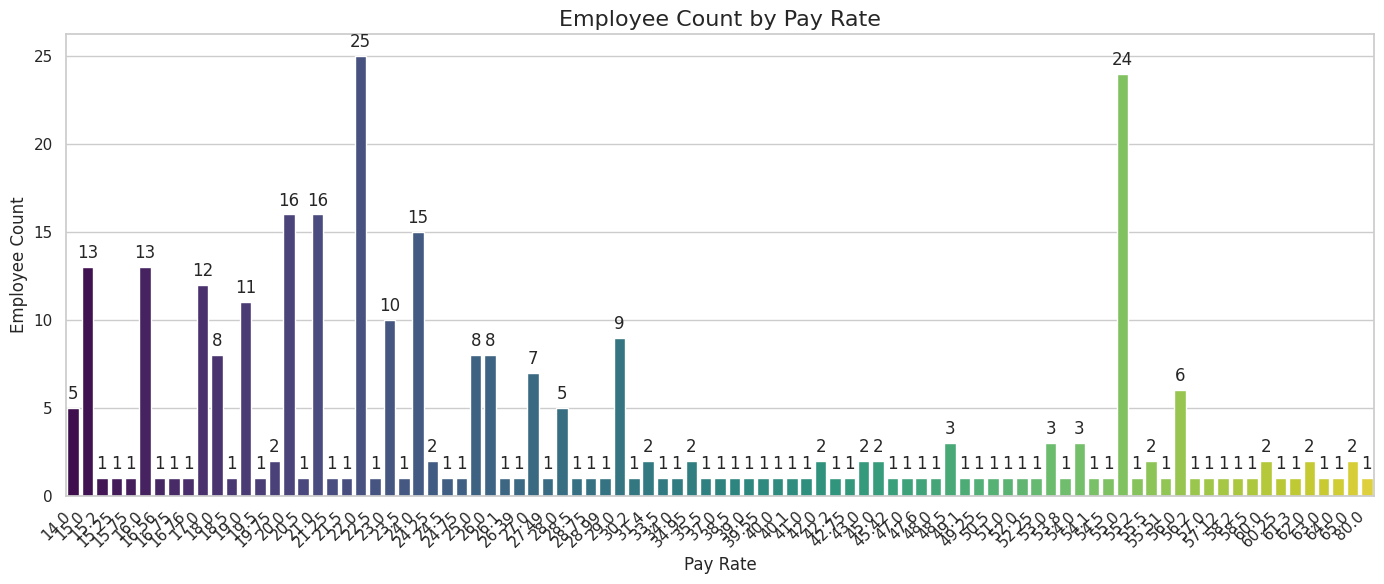

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Pay Rate' and 'Employee Number' columns

# Group by 'Pay Rate' and count employees
pay_rate_counts = df.groupby('Pay Rate')['Employee Number'].count().reset_index()
pay_rate_counts.columns = ['Pay Rate', 'Employee Count']  # Rename for clarity

# Get the top 10 pay rates with the most employees
top_10_pay_rates = pay_rate_counts.sort_values(by='Employee Count', ascending=False).head(10)

# Print the top 10 pay rates
print("Top 10 Pay Rates with Most Employees:")
print(top_10_pay_rates)

# Plotting the Pay Rate counts (optional, you can comment this out if not needed)
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Pay Rate', y='Employee Count', data=pay_rate_counts, palette="viridis")
plt.title('Employee Count by Pay Rate', fontsize=16)
plt.xlabel('Pay Rate', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels if needed for better readability

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

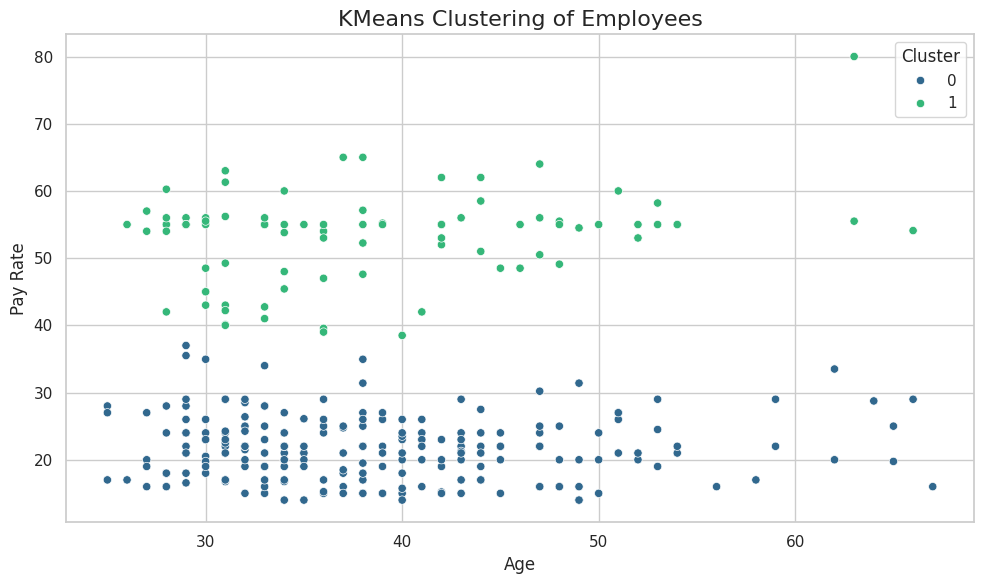

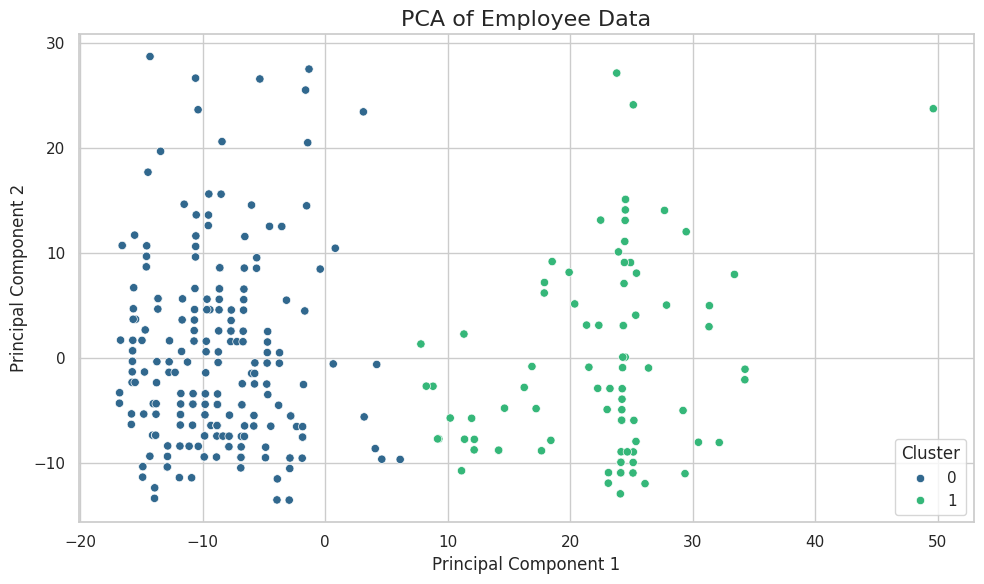

In [80]:
# Machine Learning Techniques
# Encoding categorical variables for machine learning
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder here
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans # Import KMeans

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Employee Name':  # Exclude Employee Name from encoding
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

# ... (rest of your code) ...

# Clustering: KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Pay Rate']])

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pay Rate', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Employees', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Pay Rate', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Dimensionality Reduction: PCA
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA # Import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Age', 'Pay Rate', 'Cluster']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df['Cluster'], palette='viridis', data=df_pca) # Added data=df_pca
plt.title('PCA of Employee Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [85]:
# Preparing the dataset for prediction
features = df[['Age', 'Pay Rate']]

# Creating a binary label based on 'Employment Status':
# 1 for 'Active', 0 for all others
labels = df['Employment Status'].apply(lambda status: 1 if status == 'Active' else 0)

# Continue with the rest of the code:
# Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest  # If you're using IsolationForest later

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Check if y_train has both classes
if len(np.unique(y_train)) < 2:
    print("Warning: y_train contains only one class. Logistic Regression requires at least two classes.")
    # You might need to adjust your data or model if you get this warning.
    # Options could include:
    # - Oversampling the minority class (if it's present but very small)
    # - Using a different model that can handle single-class data
    # - Revisiting the feature selection or data preprocessing

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
print("Classification Report for Training Data:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 2: Load Dataset
df = pd.read_excel("Session4-coredataset.xlsx")

# Preparing the dataset for prediction
# Assuming `df` is your DataFrame
features = df[['Age', 'Pay Rate']]

# Creating a binary label based on 'Employment Status'
labels = df['Employment Status'].apply(lambda status: 1 if status == 'Active' else 0)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Check if y_train has both classes
if len(np.unique(y_train)) < 2:
    raise ValueError("y_train contains only one class. Logistic Regression requires at least two classes.")

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
print("Classification Report for Training Data:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.58      0.30      0.39        87
           1       0.63      0.85      0.72       123

    accuracy                           0.62       210
   macro avg       0.60      0.57      0.56       210
weighted avg       0.61      0.62      0.59       210


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.43      0.25      0.32        40
           1       0.56      0.75      0.64        51

    accuracy                           0.53        91
   macro avg       0.50      0.50      0.48        91
weighted avg       0.50      0.53      0.50        91

